In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, auc, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold


# Loading Data

In [6]:
data = pd.read_csv('./data_processed/data_die_in_icu_with_commorbidities.csv', index_col=0)
data.fillna(data.mean(), inplace=True)
# data.los = (data.los > 4).astype(int)

In [3]:
def run(data):
    X = data.loc[:, data.columns != 'los']
    y = data.loc[:, data.columns == 'los']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = LogisticRegression(max_iter=1000)

    model.fit(X_train, y_train)
    
    res = pd.DataFrame(model.coef_.reshape(-1), index=X.columns, columns=['Coefficient'])
    
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy with best parameters: {accuracy * 100.0}")
    
    y_scores = model.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_scores)

    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(5, 5), dpi=300)

    plt.plot(fpr, 
            tpr, 
            color='darkorange', 
            lw=2, 
            label=f'ROC curve (area = {roc_auc:.2f})')

    plt.fill_between(fpr, tpr, color='darkorange', alpha=0.2)  # alpha 参数控制填充颜色的透明度


    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    
    return res, model

Accuracy with best parameters: 50.0


c:\Users\sitdo\.conda\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


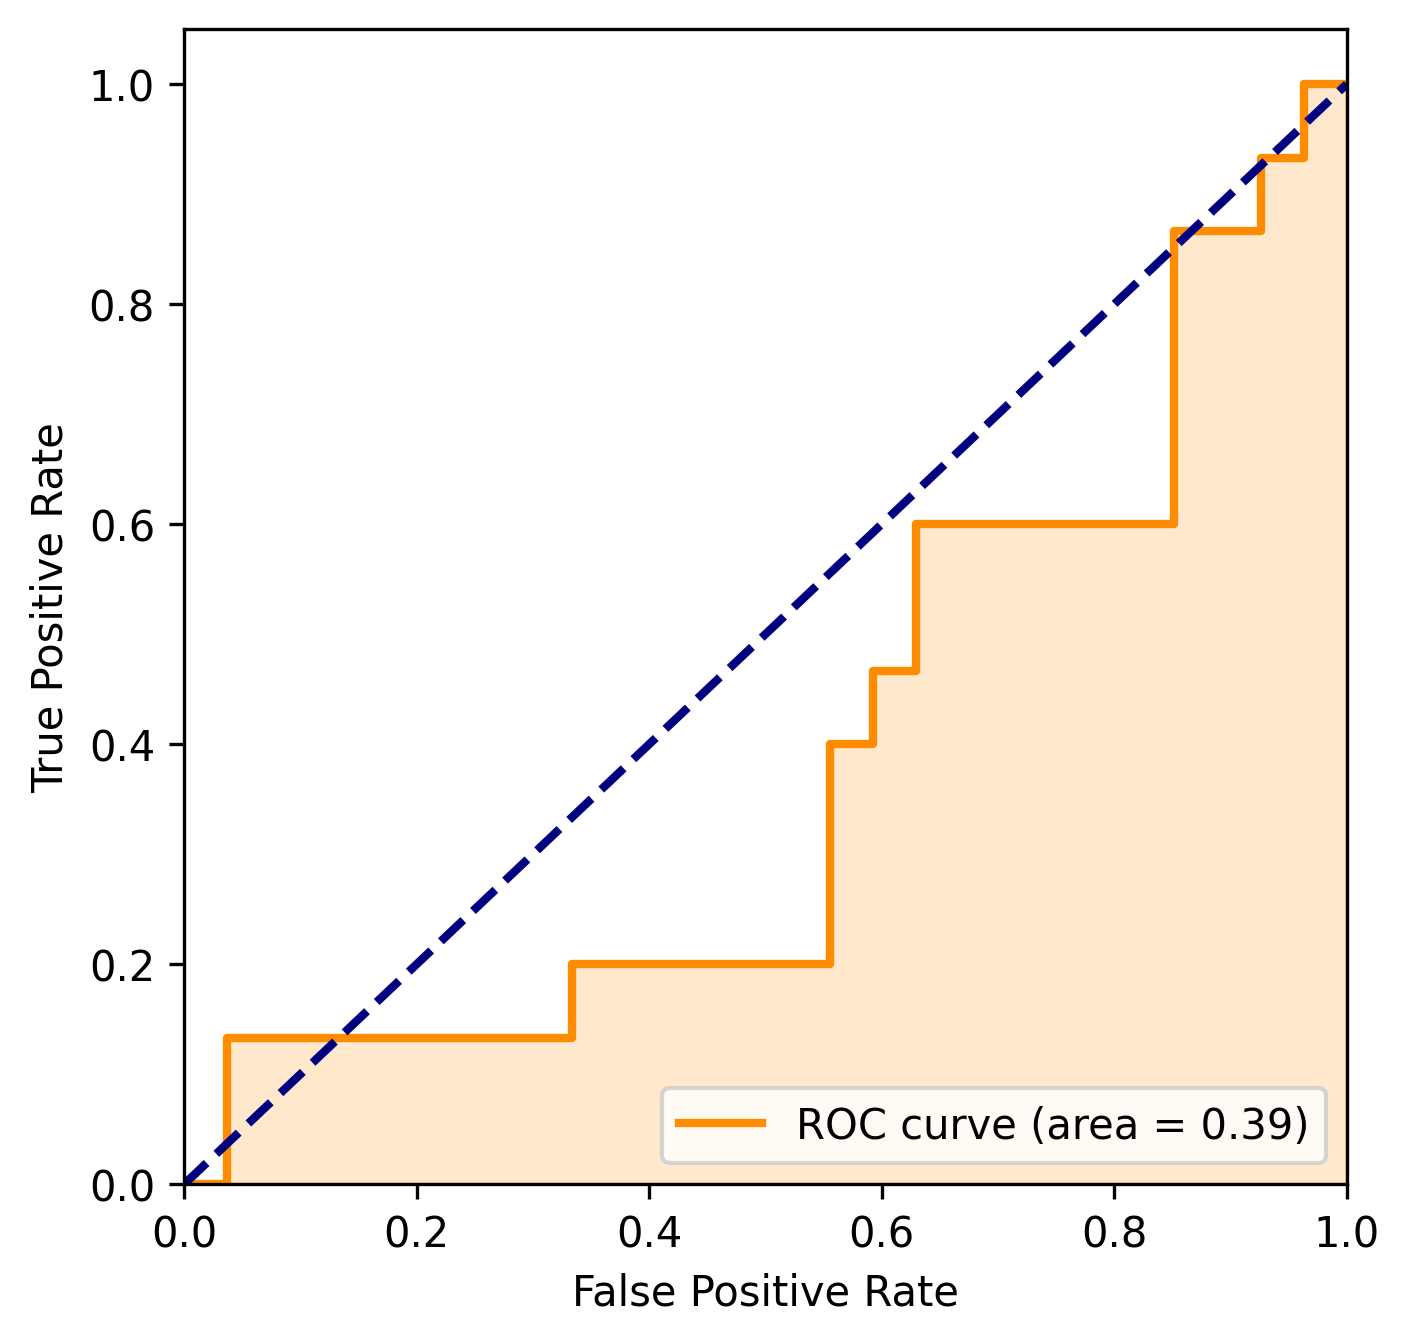

,Coefficient
gender,0.568739
age,0.211650
heart_rate,-0.590650
respiratory_rate,-0.153657
hematocrit,-0.379867
rdw,0.531632
platelet,-0.103438
mcv,0.427324
mch,0.011441
hemoglobin,0.502607


In [4]:
res, model = run(data)

res

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def run(data):
    X = data.loc[:, data.columns != 'los']
    y = data.loc[:, data.columns == 'los']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = LinearRegression()

    model.fit(X_train, y_train)
    
    res = pd.DataFrame(model.coef_.reshape(-1), index=X.columns, columns=['Coefficient'])
    
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R²: {r2}")

    return res, model


In [10]:
res, model = run(data)

res

Mean Squared Error: 42.674823787709485
R²: -1.0568631047239445


,Coefficient
gender,6.812909e-01
age,-5.182908e-01
heart_rate,-4.965463e-01
respiratory_rate,-6.312746e-01
hematocrit,-6.877053e+00
rdw,1.459312e+00
platelet,1.102119e+00
mcv,4.138899e+00
mch,-3.748251e+00
hemoglobin,6.412568e+00
